In [1]:
import abtem
import ase
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams["font.family"] = "serif"
# plt.rcParams["font.serif"] = ["Times"]

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Beam view'}, xlabel='x [Å]', ylabel='y [Å]'>)

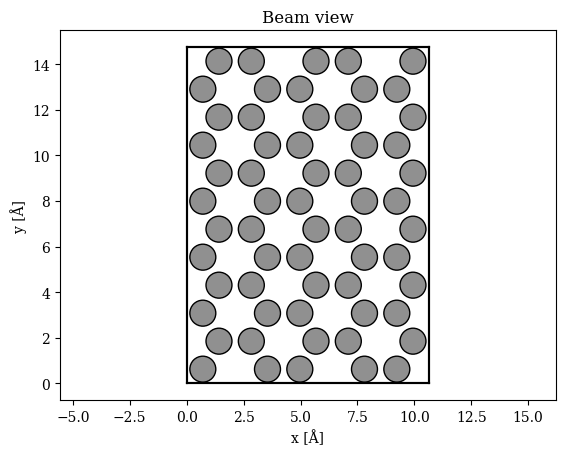

In [3]:
atoms = ase.build.graphene_nanoribbon(n=5,m=6,sheet=True)

positions = atoms.positions

cell = atoms.cell

atoms.set_positions(positions[:,[0,2,1]])

atoms.set_cell(np.array([[cell[0,0],0,0],[0,cell[2,2],0],[0,0,4]]))

atoms.pbc = [True, True, False]

atoms.center(axis=2)
atoms.center(axis=1)
atoms.center(axis=0)

abtem.show_atoms(atoms, plane="xy", title="Beam view")


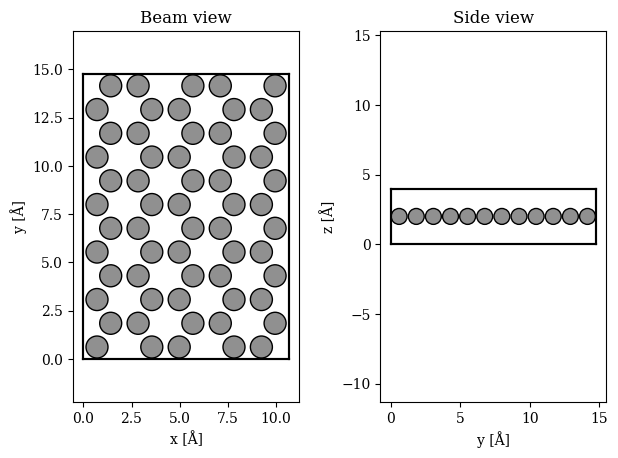

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2)
abtem.show_atoms(atoms, plane="xy", ax=ax1, title="Beam view")
abtem.show_atoms(atoms, plane="yz", ax=ax2, title="Side view");
plt.tight_layout(pad=1.5)
# plt.savefig("bwsp_graphene_ase.png", dpi=900, bbox_inches='tight')

In [5]:
frozen_phonons = abtem.FrozenPhonons(atoms, 16, sigmas=0.1)

In [6]:
potential = abtem.Potential(
    frozen_phonons,
    sampling=0.05,
    projection="infinite",
    slice_thickness=1,)

In [7]:
wave = abtem.PlaneWave(energy=100e3)

In [8]:
exit_wave = wave.multislice(potential)

In [9]:
exit_wave.compute()

[########################################] | 100% Completed | 2.13 ss


In [10]:
Cs = -7e-6 * 1e10  # spherical aberration (-8 um)

zs = np.sign(Cs) * np.sqrt(np.abs(Cs)*wave.wavelength) #scherzer defocus

ctf = abtem.CTF(Cs=Cs, energy=wave.energy, defocus=zs, semiangle_cutoff=45)

In [11]:
Cc = 1.0e-3 * 1e10  # chromatic aberration (1.2 mm)
energy_spread = 0.35  # standard deviation energy spread (0.35 eV)

focal_spread = Cc * energy_spread / exit_wave.energy

incoherent_ctf = ctf.copy()
incoherent_ctf.focal_spread = focal_spread

In [12]:
measurement_ensemble = exit_wave.apply_ctf(incoherent_ctf).intensity()

(-0.024999999999999998,
 10.624999999999998,
 -0.024927487973795327,
 14.73214539251304)

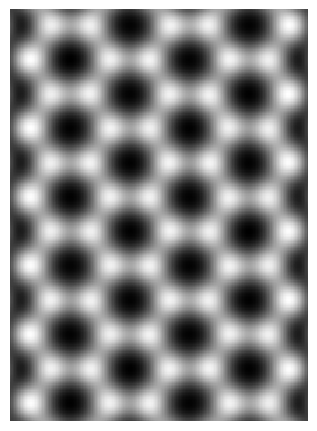

In [13]:
measurement = measurement_ensemble.mean(0)

measurement.show(cmap='gray');
# plt.tight_layout()
plt.axis('off')
# plt.savefig('bwsp_graphene_abtem.png', dpi=900, bbox_inches='tight', pad_inches=0)

(-0.024999999999999998,
 10.624999999999998,
 -0.024927487973795327,
 14.73214539251304)

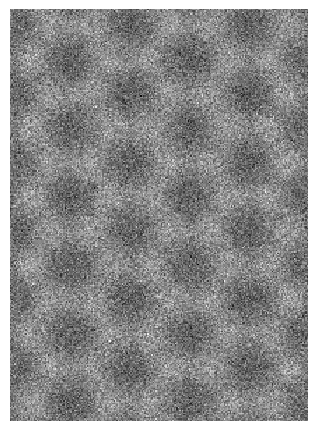

In [14]:
noisy_measurement = measurement.poisson_noise(dose_per_area=1e5)

noisy_measurement.show(cmap='gray');
plt.axis('off')
# plt.savefig('bwsp_graphene_nanoribbon_hrtem.png', dpi=900, bbox_inches='tight', pad_inches=0)